<a href="https://colab.research.google.com/github/cafmf/introd-cd/blob/master/projeto_introd_cd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Leitura dos dados sobre as avalição feitas ao serviço do airbnb na cidade de Nova York

In [0]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/cafmf/introd-cd/master/AB_NYC_2019.csv'
airbnb_df = pd.read_csv(url)

2 - Visualizando tamanho do frame


In [57]:
airbnb_df.shape

(48895, 16)

3 - Descrevendo os dados para análise de possiveis valores com muita discrepância. Baseado na descrição dos dados, os campos de price e minimum_nights são passíveis de possuir outliers

In [58]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


4 - Visualização para análise de outliers para o campo price utilizando log na base 10 para otimizar visualição

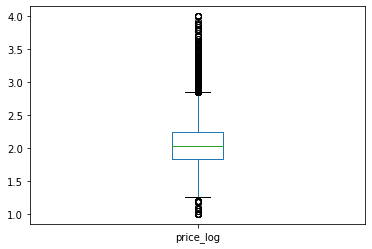

In [59]:

airbnb_df['price_log'] = np.log10(airbnb_df[airbnb_df['price'] > 0]['price'])
airbnb_df['price_log'].plot.box()

5 - Removendo outliers para o campo "Price" utilizando método de tukey

In [60]:
q1 = airbnb_df['price'].quantile(q=0.25)
q3 = airbnb_df['price'].quantile(q=0.75)
iqr = q3 - q1
airbnb_df = airbnb_df[(airbnb_df['price'] > (q1-1.5*iqr)) & (airbnb_df['price'] < (q3+1.5*iqr))]
airbnb_df.shape

(45918, 17)

6 - Visualização para análise de outliers para o campo minimum_nights utilizando log na base 10 para otimizar visualição

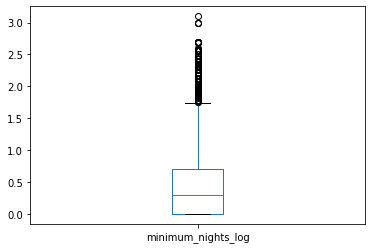

In [61]:
airbnb_df['minimum_nights_log'] = np.log10(airbnb_df[airbnb_df['minimum_nights'] > 0]['minimum_nights'])
airbnb_df['minimum_nights_log'].plot.box()

7 - Removendo outliers para o campo minimum_nights utilizando método de tukey

In [62]:
q1 = airbnb_df['minimum_nights'].quantile(q=0.25)
q3 = airbnb_df['minimum_nights'].quantile(q=0.75)
iqr = q3 - q1
airbnb_df = airbnb_df[(airbnb_df['minimum_nights'] > (q1-1.5*iqr)) & (airbnb_df['minimum_nights'] < (q3+1.5*iqr))]
airbnb_df.shape

(39707, 18)

8 - Fazendo análise de campos nulos

In [63]:
airbnb_df.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           20
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6691
reviews_per_month                 6691
calculated_host_listings_count       0
availability_365                     0
price_log                            9
minimum_nights_log                   0
dtype: int64

9 - Verificando dados duplicados

In [65]:
duplicated = airbnb_df[airbnb_df.duplicated()]
len(duplicated)

0

10 - Identificando hospedagens cujo número de avaliações se aproximam da média sem considerar nulos para a posição de number_of_reviews

In [66]:
# uma vez removido os outliers, será considerado a média como medida de tendência central. Devido ao resultado só considera dados sobre avalição,
# os campos nulos serão desconsiderados
airbnb_without_null_reviews = airbnb_df.dropna(axis=0)
std = airbnb_without_null_reviews['number_of_reviews'].std()
mean = airbnb_without_null_reviews['number_of_reviews'].mean()
minor_threshold = std - mean
major_threshold = std + mean
most_rated_per_neigborhood = airbnb_without_null_reviews[(airbnb_df['number_of_reviews'] >= minor_threshold) & (airbnb_df['number_of_reviews'] <= major_threshold)]
most_rated_per_neigborhood.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log,minimum_nights_log
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2.352183,0.000000
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2.301030,0.477121
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,2.130334,0.698970
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21,1.995635,0.477121
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364,1.903090,0.000000


11 - Identificando as acomodações mais bem avaliadas que permitem serem reservadas por uma noite no bairro de Midtown

In [0]:
one_night_most_rated = most_rated_per_neigborhood[(most_rated_per_neigborhood['neighbourhood'] == 'Midtown') & (most_rated_per_neigborhood['minimum_nights'] == 1)]
one_night_most_rated = one_night_most_rated.sort_values(by=['price'])